In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/final_data/nfl_merged_wide_format_no_multicollinearity.csv')
df

Player Name  2022 Age 2022 Position 2022 Team  2022 Games Played  \
0        A.J. Brown      25.0            WR       PHI               17.0   
1        A.J. Green      34.0            WR       ARI               15.0   
2     A.J. McCarron       NaN           NaN       NaN                NaN   
3        A.T. Perry       NaN           NaN       NaN                NaN   
4         AJ Barner       NaN           NaN       NaN                NaN   
..              ...       ...           ...       ...                ...   
965  Zander Horvath      24.0            RB       LAC               15.0   
966   Zane Gonzalez       NaN           NaN       NaN                NaN   
967     Zay Flowers       NaN           NaN       NaN                NaN   
968       Zay Jones      27.0            WR       JAX               16.0   
969  Zonovan Knight      21.0            RB       NYJ                7.0   

     2022 Games Started  2022 Total Passing  2022 Interceptions Thrown  \
0                  16.0                 NaN                        NaN   
1                  10.0                 NaN                        NaN   
2                   NaN                 NaN                        NaN   
3                   NaN                 NaN                        NaN   
4                   NaN                 NaN                        NaN   
..                  ...                 ...                        ...   
965                 2.0                 NaN                        NaN   
966                 NaN                 NaN                        NaN   
967                 NaN                 NaN                        NaN   
968                15.0                 NaN                        NaN   
969                 4.0                 NaN                        NaN   

     2022 Rushing Touchdowns  2022 Carries*Yards  ...  2024 Extra Points Made  \
0                        0.0                 0.0  ...                     NaN   
1                        0.0                 0.0  ...                     NaN   
2                        NaN                 NaN  ...                     NaN   
3                        NaN                 NaN  ...                     NaN   
4                        NaN                 NaN  ...                     NaN   
..                       ...                 ...  ...                     ...   
965                      0.0                32.0  ...                     NaN   
966                      NaN                 NaN  ...                    19.0   
967                      NaN                 NaN  ...                     NaN   
968                      0.0                72.0  ...                     NaN   
969                      1.0             25500.0  ...                     NaN   

     2024 ST_Interceptions  2024 ST_Safeties  \
0                      NaN               NaN   
1                      NaN               NaN   
2                      NaN               NaN   
3                      NaN               NaN   
4                      NaN               NaN   
..                     ...               ...   
965                    NaN               NaN   
966                    NaN               NaN   
967                    NaN               NaN   
968                    NaN               NaN   
969                    NaN               NaN   

     2024 ST_Special Teams Touchdowns  2024 XP2  2024 Touchdowns Allowed  \
0                                 NaN       NaN                      NaN   
1                                 NaN       NaN                      NaN   
2                                 NaN       NaN                      NaN   
3                                 NaN       NaN                      NaN   
4                                 NaN       NaN                      NaN   
..                                ...       ...                      ...   
965                               NaN       NaN                      NaN   
966                               NaN       NaN 

In [4]:
for column in df.columns:
    print(column)


Player Name
2022 Age
2022 Position
2022 Team
2022 Games Played
2022 Games Started
2022 Total Passing
2022 Interceptions Thrown
2022 Rushing Touchdowns
2022 Carries*Yards
2022 Receiving Touchdowns
2022 Receptions*Yards
2022 Fumbles
2022 Field Goals Made
2022 Extra Points Made
2022 ST_Interceptions
2022 ST_Safeties
2022 ST_Special Teams Touchdowns
2022 XP2
2022 Touchdowns Allowed
2022 Average ADP
2022 Positional ADP
2022 PPR Fantasy Points Scored
2022 Standard Fantasy Points Scored
2023 Age
2023 Position
2023 Team
2023 Games Played
2023 Games Started
2023 Total Passing
2023 Interceptions Thrown
2023 Rushing Touchdowns
2023 Carries*Yards
2023 Receiving Touchdowns
2023 Receptions*Yards
2023 Fumbles
2023 Field Goals Made
2023 Extra Points Made
2023 ST_Interceptions
2023 ST_Safeties
2023 ST_Special Teams Touchdowns
2023 XP2
2023 Touchdowns Allowed
2023 Average ADP
2023 Positional ADP
2023 PPR Fantasy Points Scored
2023 Standard Fantasy Points Scored
2024 Age
2024 Position
2024 Team
2024 Game

In [5]:
for year in [2022, 2023, 2024]:
    df.drop(columns=[f"{year} PPR Fantasy Points Scored", f"{year} Standard Fantasy Points Scored"], inplace=True)

In [6]:
import matplotlib.pyplot as plt

def plot_histograms(df):
    """
    Plots histograms for each numerical variable in the given dataframe.
    
    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
    """
    num_cols = df.select_dtypes(include=['number']).columns  
    num_vars = len(num_cols)

    if num_vars == 0:
        print("No numerical columns found in the dataframe.")
        return
    
    fig, axes = plt.subplots(nrows=(num_vars // 3) + 1, ncols=min(3, num_vars), figsize=(15, 5 * ((num_vars // 3) + 1)))
    axes = axes.flatten()  

    for i, col in enumerate(num_cols):
        axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(axis='y', alpha=0.75)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


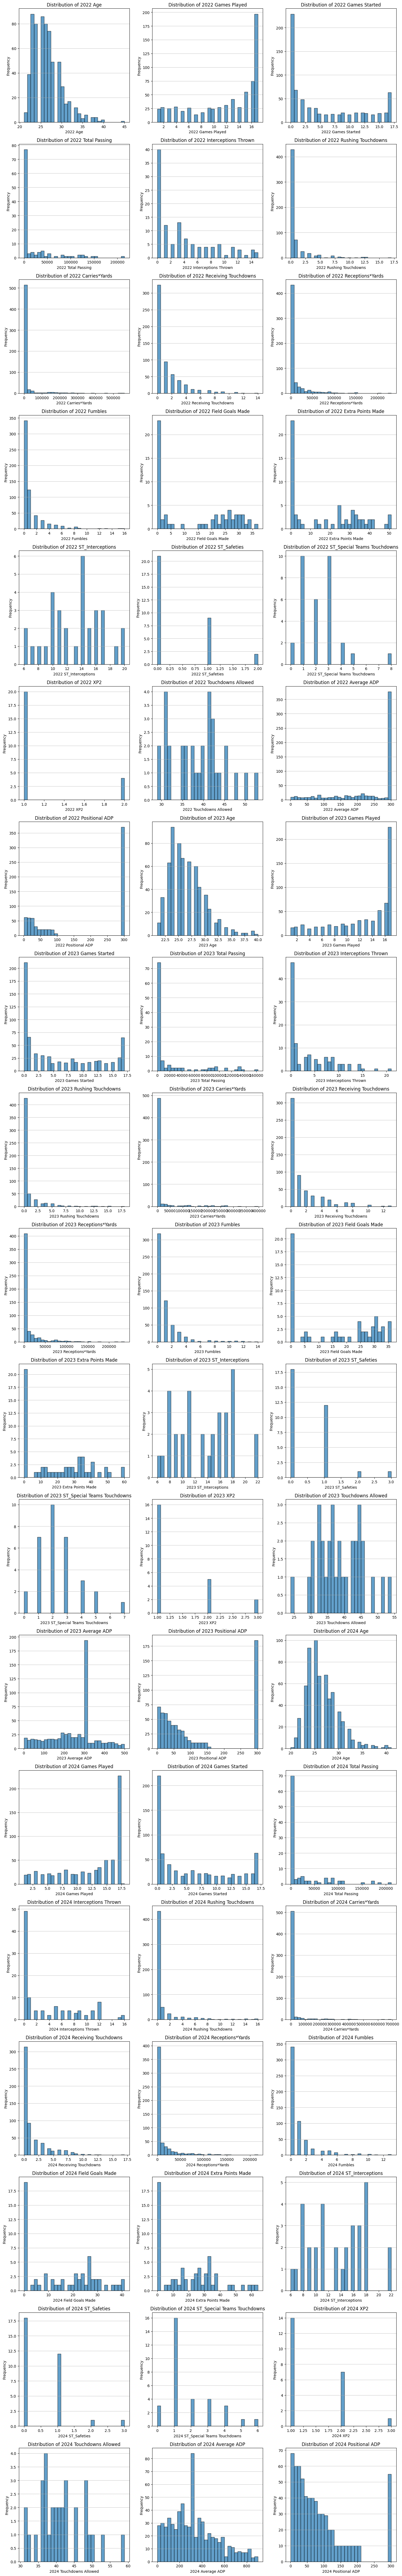

In [7]:
plot_histograms(df)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_log_histograms(df):
    """
    Plots histograms for each numerical variable in the given dataframe after applying log transformation.
    
    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
    """
    num_cols = df.select_dtypes(include=['number']).columns  
    num_vars = len(num_cols)

    if num_vars == 0:
        print("No numerical columns found in the dataframe.")
        return
    
    # Shift data to ensure all values are non-negative
    df_shifted = df[num_cols] - df[num_cols].min() + 1 
    df_log = np.log1p(df_shifted)

    fig, axes = plt.subplots(nrows=(num_vars // 3) + 1, ncols=min(3, num_vars), figsize=(15, 5 * ((num_vars // 3) + 1)))
    axes = axes.flatten()  

    for i, col in enumerate(num_cols):
        axes[i].hist(df_log[col], bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Log-Scaled Distribution of {col}')
        axes[i].set_xlabel(f'log(1 + ({col} - min + 1))')
        axes[i].set_ylabel('Frequency')
        axes[i].grid(axis='y', alpha=0.75)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


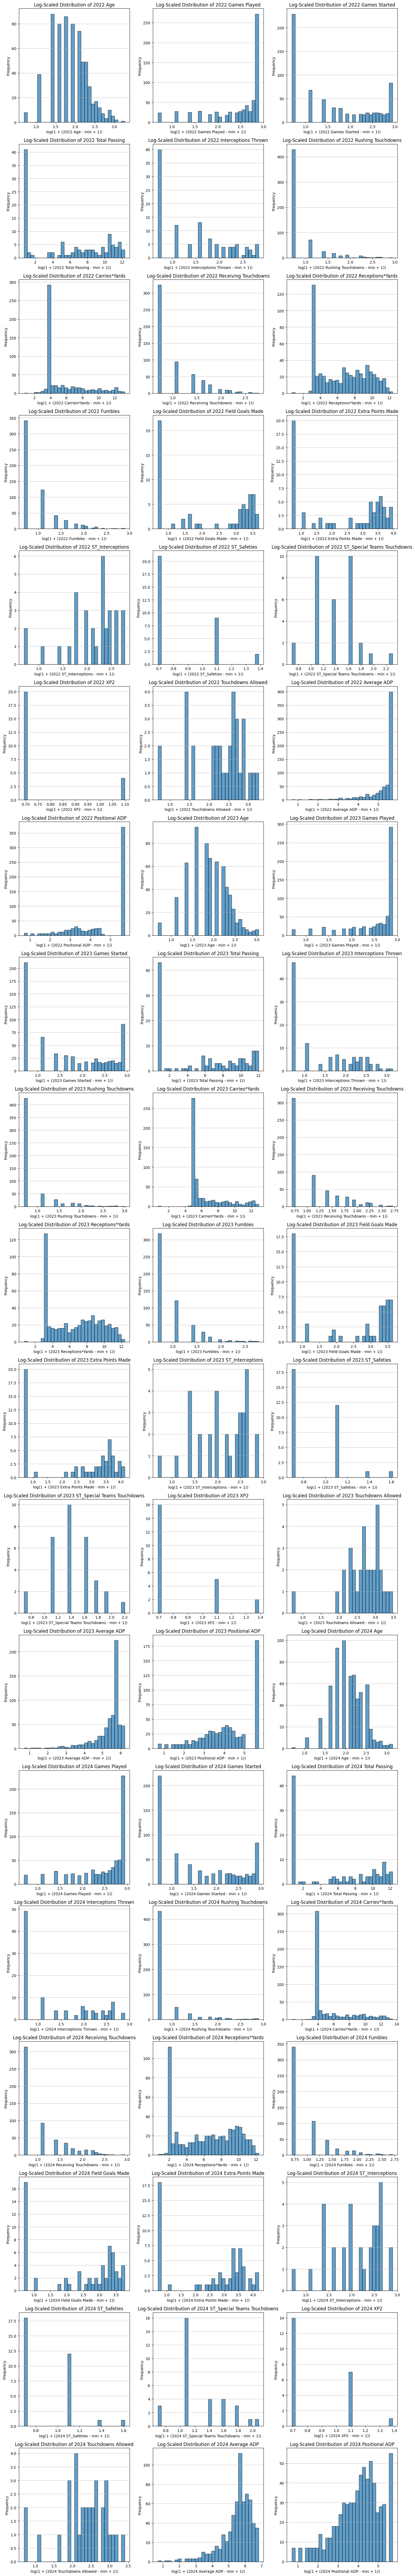

In [9]:
plot_log_histograms(df)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

def plot_transformed_histograms(df, transform="log"):
    """
    Plots histograms for each numerical variable after applying a chosen transformation.

    Parameters:
        df (pd.DataFrame): The dataframe containing data.
        transform (str): The transformation type ('log', 'boxcox', 'yeo-johnson', 'sqrt').
    """
    num_cols = df.select_dtypes(include=['number']).columns
    num_vars = len(num_cols)

    if num_vars == 0:
        print("No numerical columns found.")
        return
    
    df_transformed = df[num_cols].copy()
    
    for col in num_cols:
        if transform == "log":
            df_transformed[col] = np.log1p(df_transformed[col] - df_transformed[col].min() + 1)
        elif transform == "boxcox":
            if (df_transformed[col] > 0).all():  # Box-Cox only works for positive values
                df_transformed[col], _ = boxcox(df_transformed[col] + 1e-6)  
            else:
                print(f"Skipping Box-Cox for {col} (contains non-positive values).")
        elif transform == "yeo-johnson":
            pt = PowerTransformer(method="yeo-johnson")
            df_transformed[col] = pt.fit_transform(df_transformed[[col]]).flatten()
        elif transform == "sqrt":
            df_transformed[col] = np.sqrt(df_transformed[col] - df_transformed[col].min() + 1)

    fig, axes = plt.subplots(nrows=(num_vars // 3) + 1, ncols=min(3, num_vars), figsize=(15, 5 * ((num_vars // 3) + 1)))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        axes[i].hist(df_transformed[col], bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'{transform.capitalize()} Transformed {col}')
        axes[i].set_xlabel(f'{transform.capitalize()}({col})')
        axes[i].set_ylabel('Frequency')
        axes[i].grid(axis='y', alpha=0.75)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


Skipping Box-Cox for 2022 Age (contains non-positive values).
Skipping Box-Cox for 2022 Games Played (contains non-positive values).
Skipping Box-Cox for 2022 Games Started (contains non-positive values).
Skipping Box-Cox for 2022 Total Passing (contains non-positive values).
Skipping Box-Cox for 2022 Interceptions Thrown (contains non-positive values).
Skipping Box-Cox for 2022 Rushing Touchdowns (contains non-positive values).
Skipping Box-Cox for 2022 Carries*Yards (contains non-positive values).
Skipping Box-Cox for 2022 Receiving Touchdowns (contains non-positive values).
Skipping Box-Cox for 2022 Receptions*Yards (contains non-positive values).
Skipping Box-Cox for 2022 Fumbles (contains non-positive values).
Skipping Box-Cox for 2022 Field Goals Made (contains non-positive values).
Skipping Box-Cox for 2022 Extra Points Made (contains non-positive values).
Skipping Box-Cox for 2022 ST_Interceptions (contains non-positive values).
Skipping Box-Cox for 2022 ST_Safeties (contains n

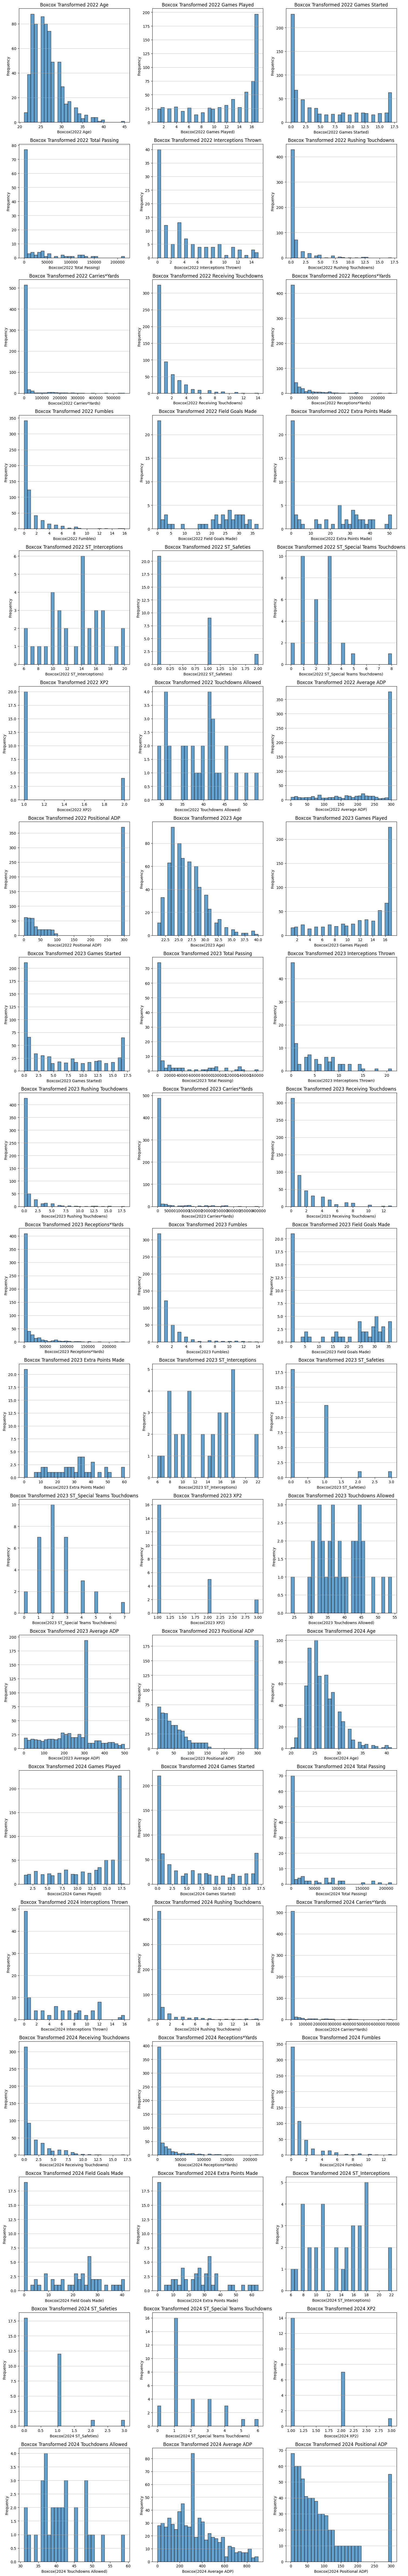

In [11]:
plot_transformed_histograms(df, transform="boxcox")

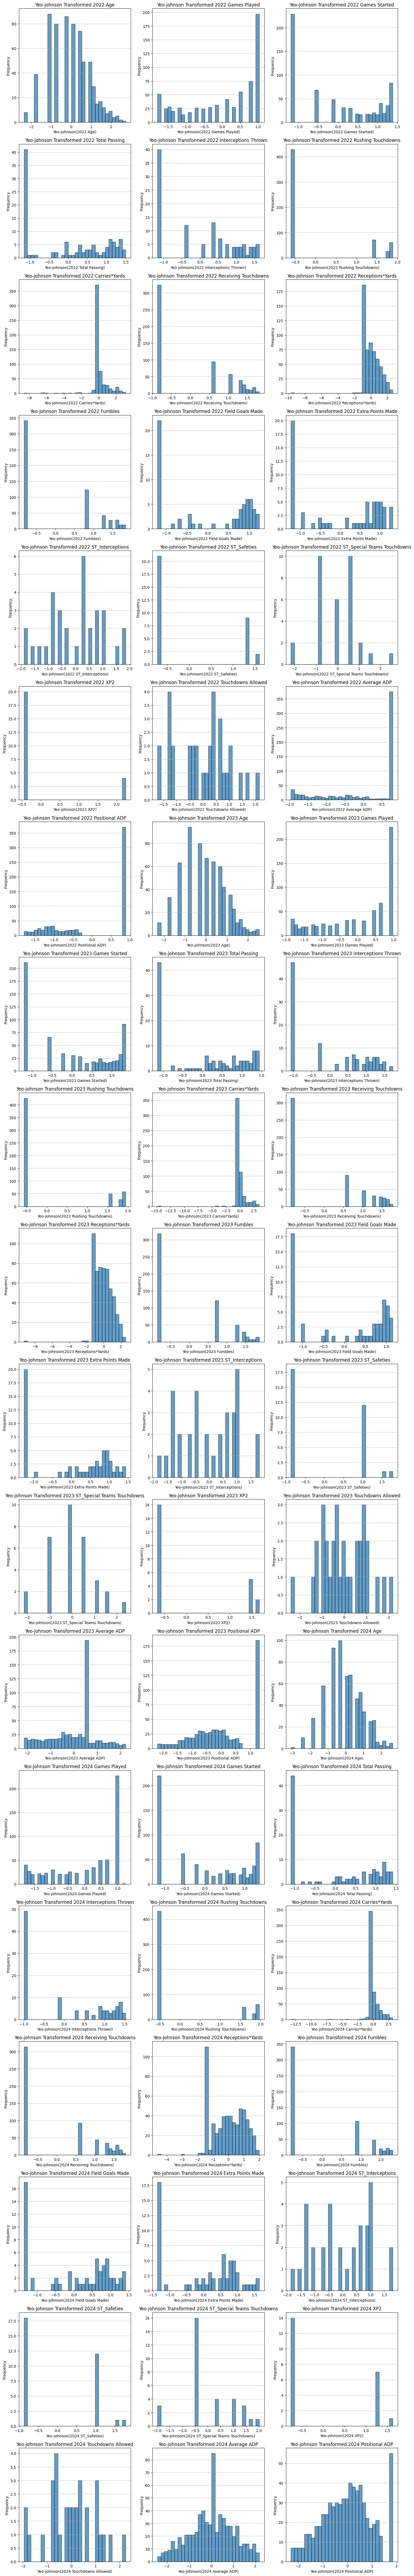

In [12]:
plot_transformed_histograms(df, transform="yeo-johnson")

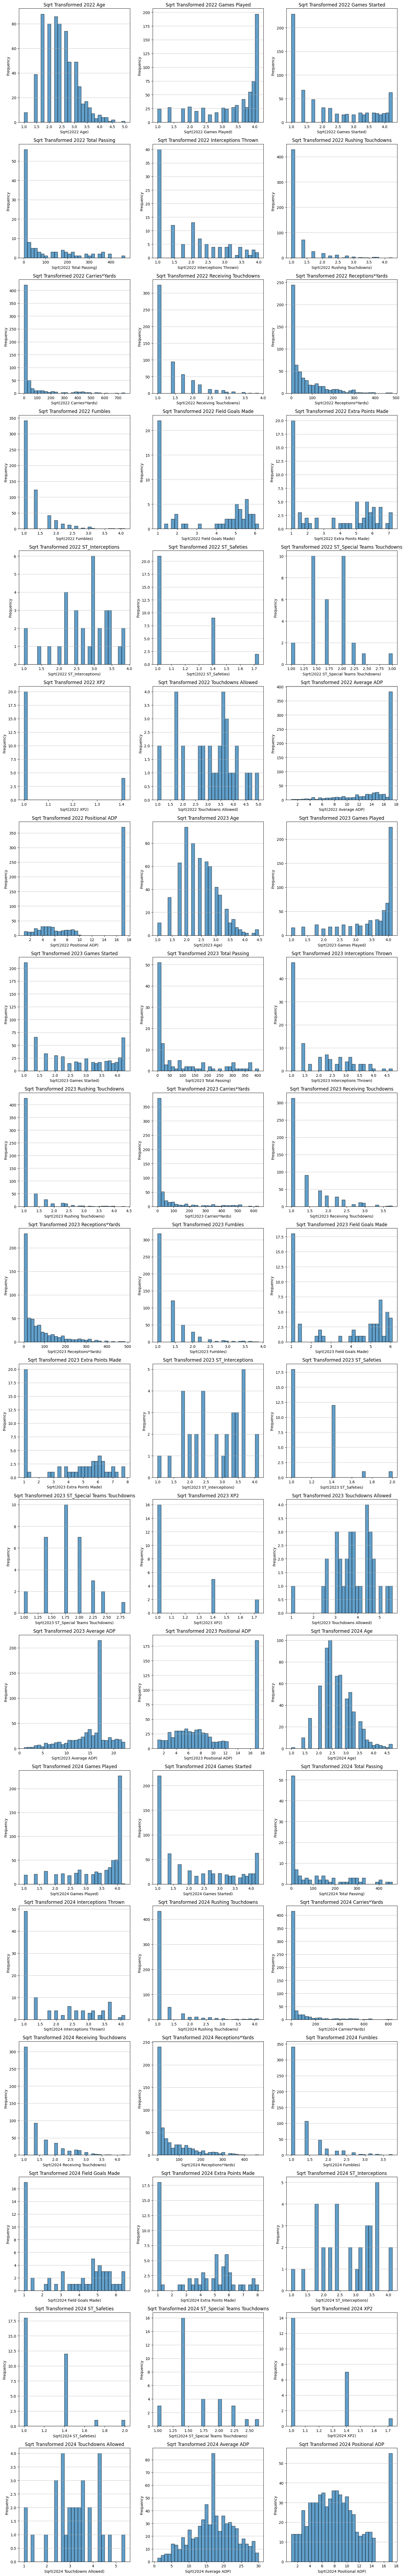

In [13]:
plot_transformed_histograms(df, transform="sqrt")